In [1]:
from imutils import contours
import matplotlib.pyplot as plt 
import numpy as np
import imutils
import cv2
import PIL

In [2]:
def plot(img, cmap=None):
    plt.figure(figsize=(20,10))
    plt.axis('off')
    plt.imshow(img, cmap=cmap)
    plt.show()

# Template Matching

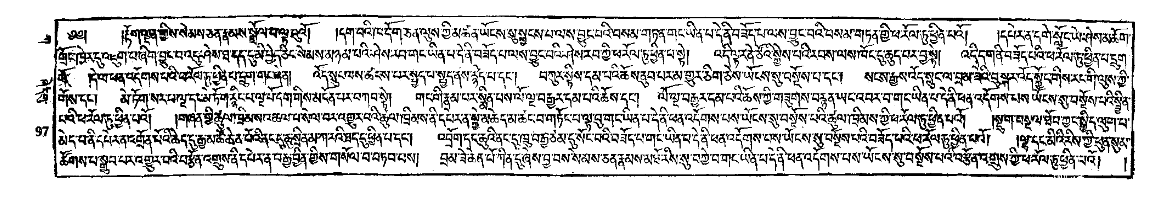

(319, 2036, 3)

In [3]:
img = cv2.imread('../images/test1.png')
plot(img); img.shape

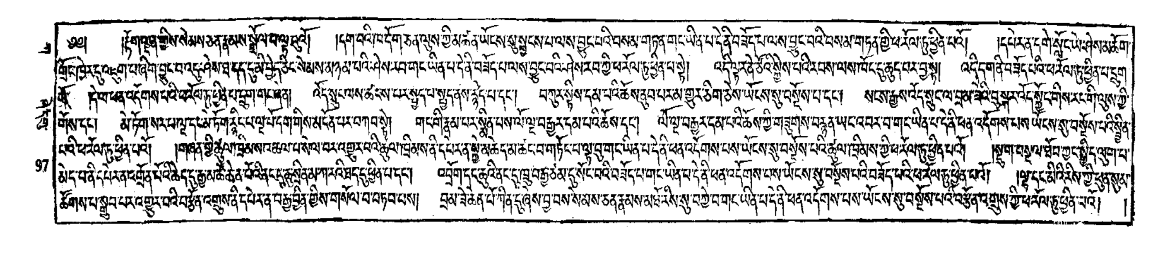

(600, 3000, 3)

In [80]:
img = cv2.resize(img, (3000, 600))
plot(img); img.shape

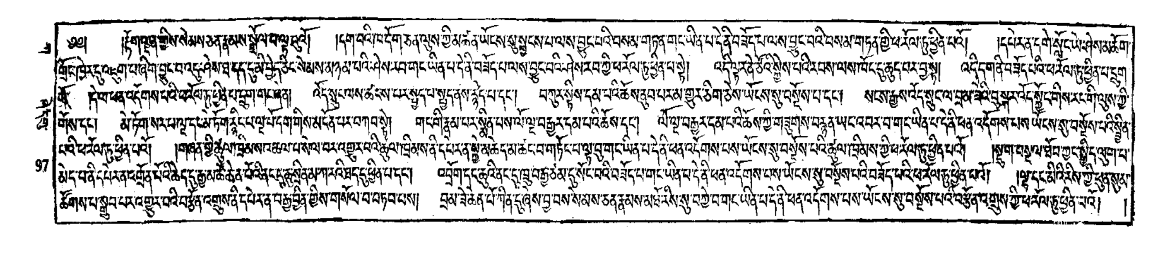

(600, 3000)

In [81]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plot(gray, cmap='gray'); gray.shape

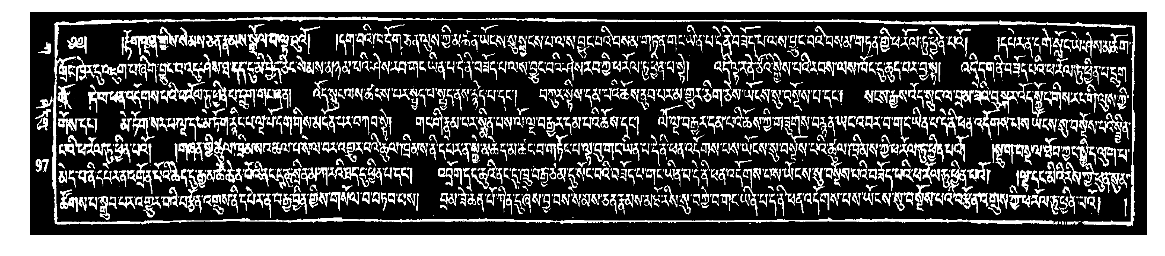

In [175]:
ret,thresh = cv2.threshold(gray,127,255,cv2.THRESH_BINARY_INV)
plot(thresh, cmap='gray')

## morphological operation:
- Morphological transformations are some simple operations based on the image shape
- It is normally performed on binary images
- It needs two inputs, one is our original image, second one is called structuring element or kernel which decides the nature of operation

### 1. Erosion
- The basic idea of erosion is just like soil erosion only, it erodes away the boundaries of foreground object (Always try to keep foreground in white).
- A pixel in the original image (either 1 or 0) will be considered 1 only if all the pixels under the kernel is 1, otherwise it is eroded (made to zero).

- all the pixels near boundary will be discarded depending upon the size of kernel. 
- It is useful for removing small white noises
- Erosion does dialation for inverse binary image (bg is wihte and morphology is black)

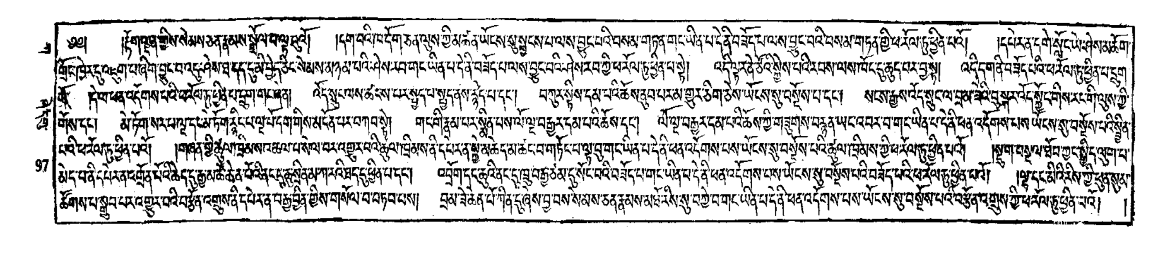

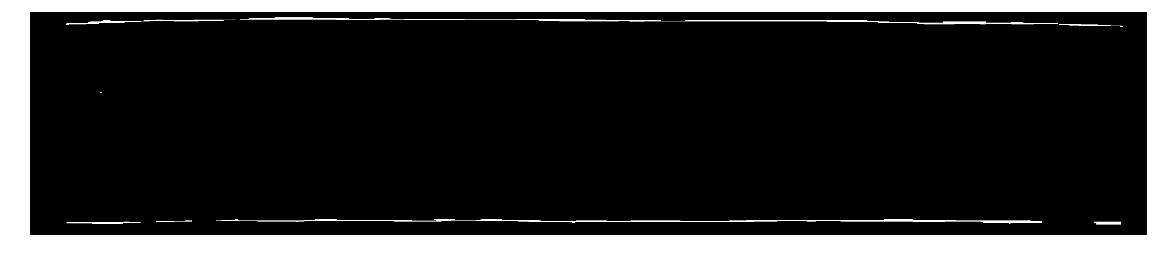

In [176]:
kernel = np.ones((1, 65), np.uint8)
erosion = cv2.erode(thresh, kernel, iterations = 1)
plot(img)
plot(erosion, cmap='gray')

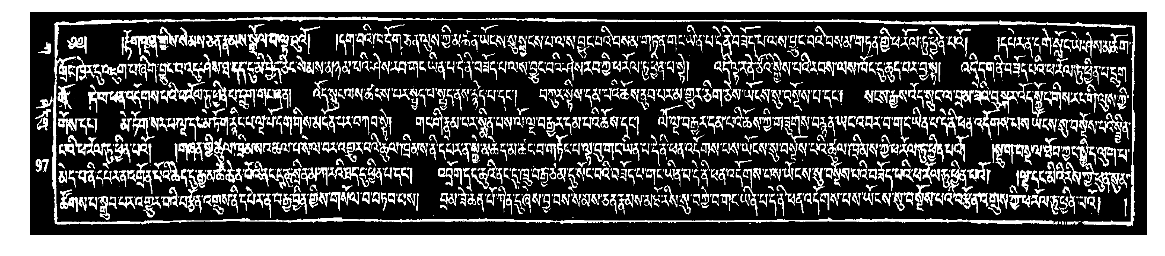

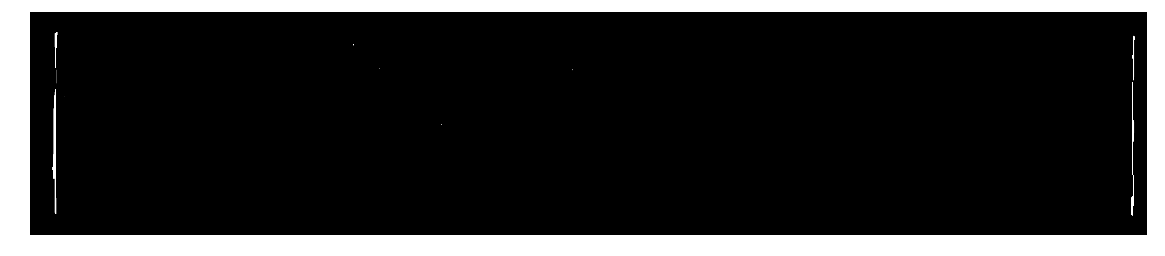

In [177]:
kernel = np.ones((55, 1), np.uint8)
erosion = cv2.erode(thresh, kernel, iterations = 1)
plot(thresh, cmap='gray')
plot(erosion, cmap='gray')

### 2. Dilation
- It is just opposite of erosion
- a pixel element is '1' if atleast one pixel under the kernel is '1'.
- So it increases the white region in the image or size of foreground object increases
- Normally, in cases like noise removal, erosion is followed by dilation
    - Because erosion removes white noises, but it also shrinks our object. So we dilate it
    - Since noise is gone, they won't come back, but our object area increases
- It is also useful in joining broken parts of an object. 

Dialation on Theshold image

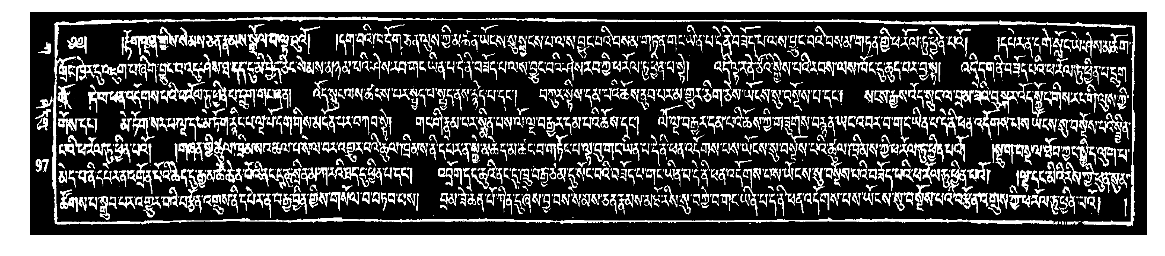

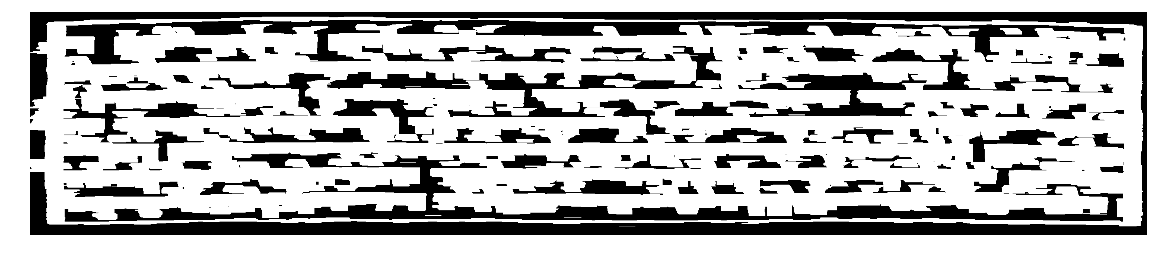

In [178]:
kernel = np.ones((1, 15), np.uint8)
dilation = cv2.dilate(thresh,kernel,iterations = 3)
plot(thresh, cmap='gray');
plot(dilation, cmap='gray')

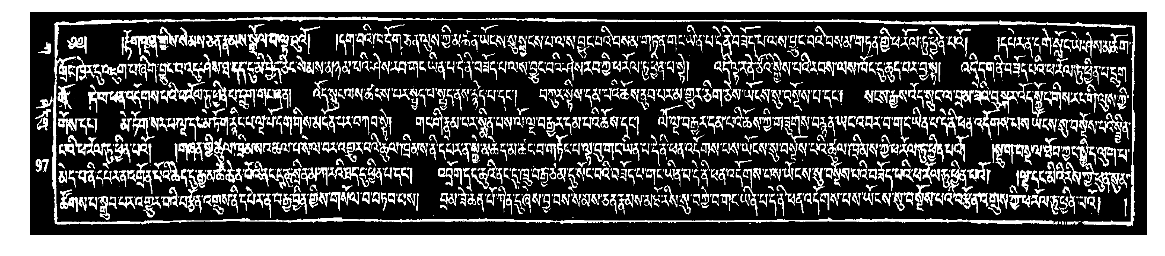

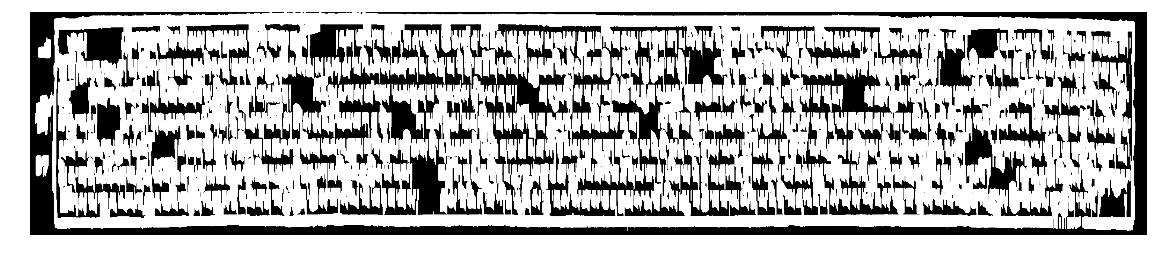

In [179]:
kernel = np.ones((9, 1), np.uint8)
dilation = cv2.dilate(thresh,kernel,iterations = 3)
plot(thresh, cmap='gray');
plot(dilation, cmap='gray')

Dialation after Erosion

### 3. Opening
- Opening is just another name of erosion followed by dilation
- It is useful in removing noise

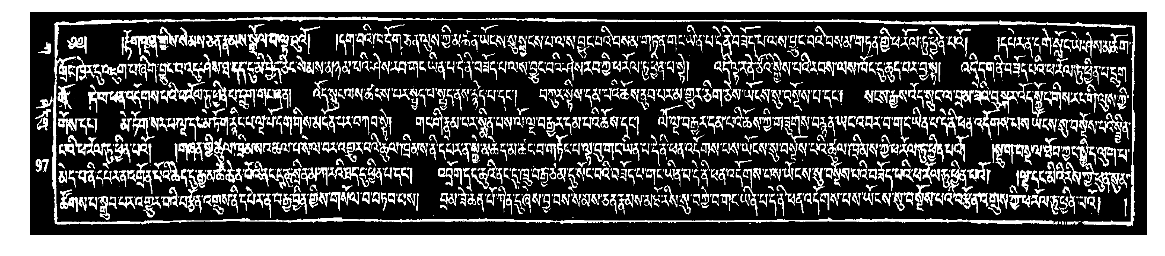

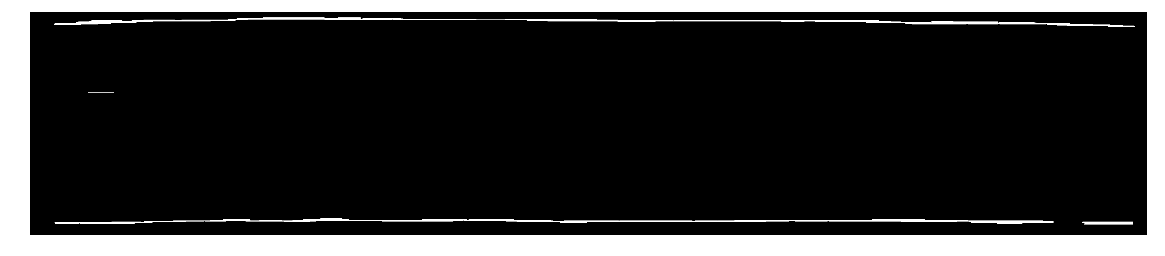

In [180]:
kernel = np.ones((1, 55), np.uint8)
opening_h = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
plot(thresh, cmap='gray')
plot(opening_h, cmap='gray');

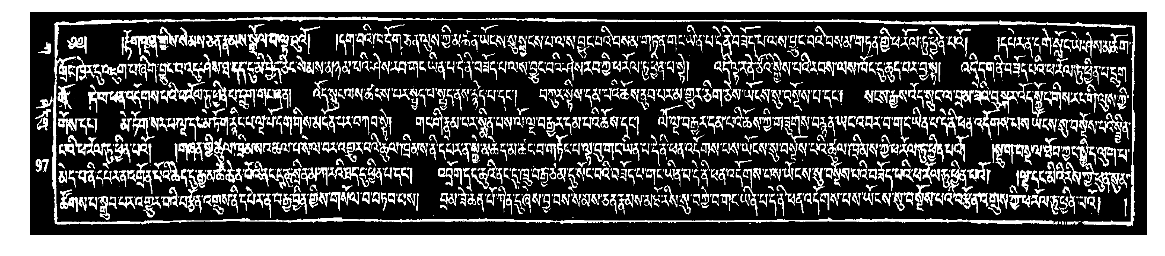

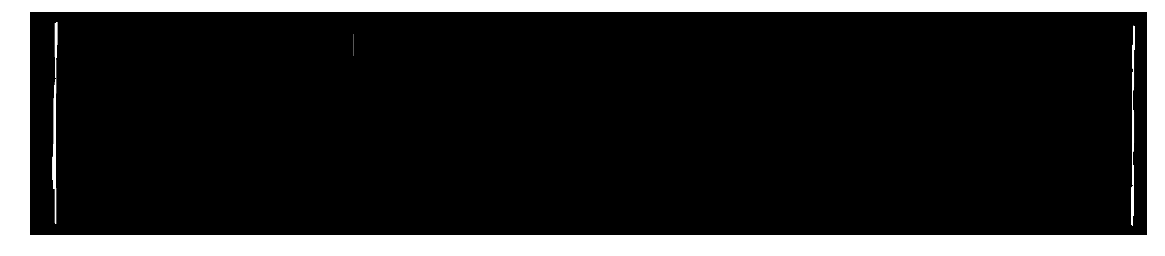

In [181]:
kernel = np.ones((59, 1), np.uint8)
opening_v = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
plot(thresh, cmap='gray')
plot(opening_v, cmap='gray');

Combine horizontal and vertical border

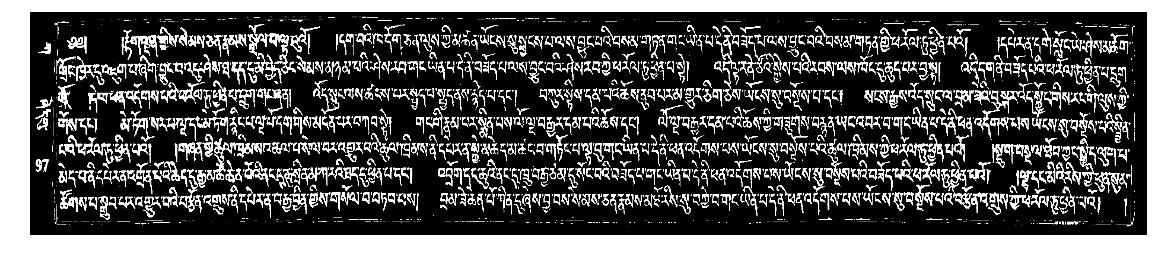

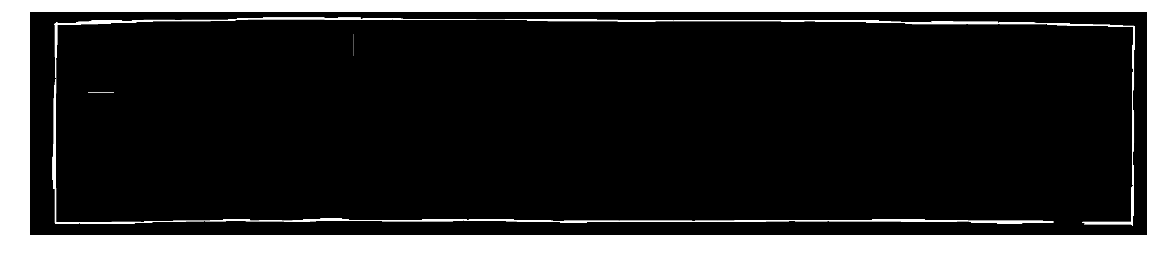

In [195]:
opening = opening_h + opening_v
plot(thresh, cmap='gray')
plot(opening, cmap='gray')

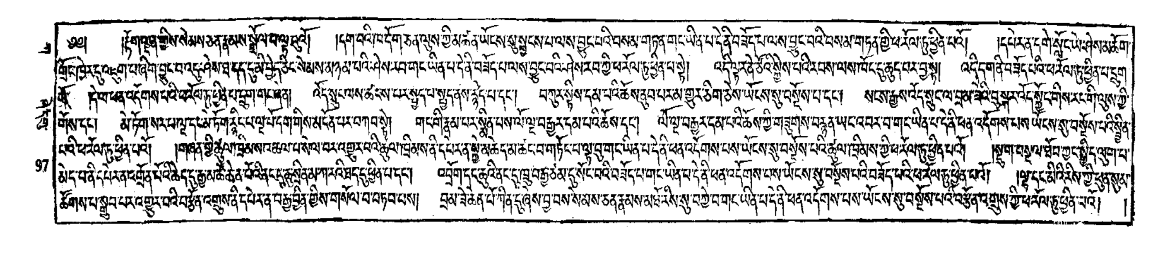

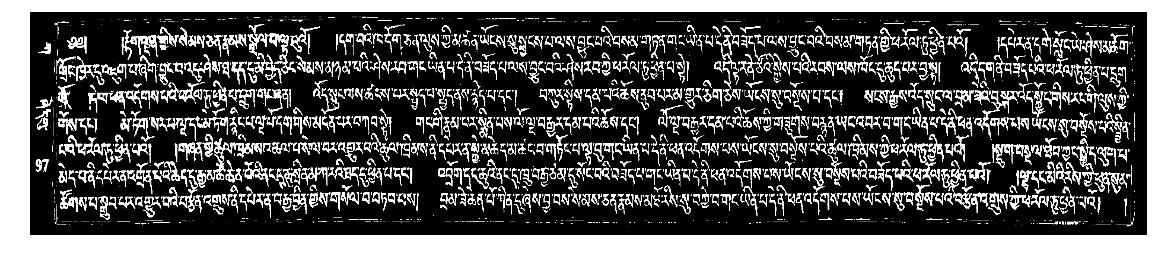

In [196]:
mask = thresh == opening
thresh[mask] = 0
plot(img)
plot(thresh, cmap='gray')

remove noise in verticle border

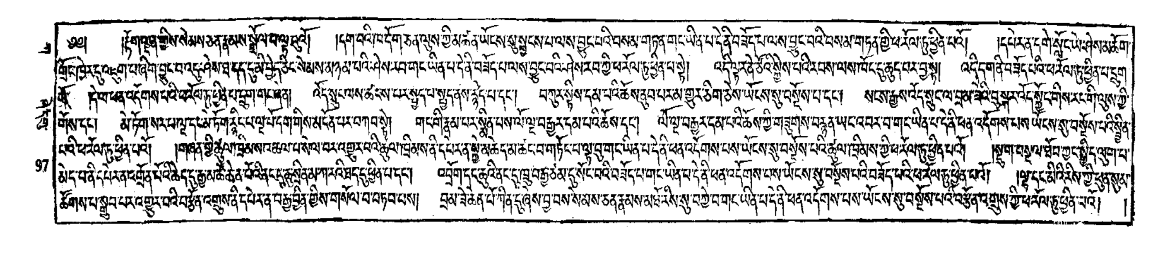

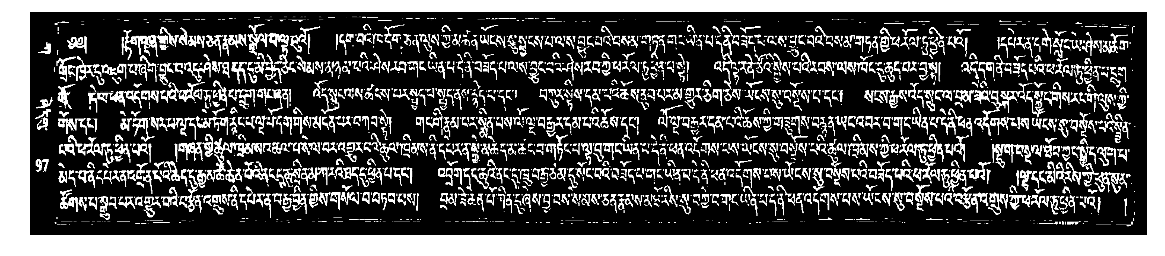

In [198]:
kernel = np.ones((1, 3), np.uint8)
output = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
plot(img)
plot(output, cmap='gray');

remove noise in horizontal border

Input


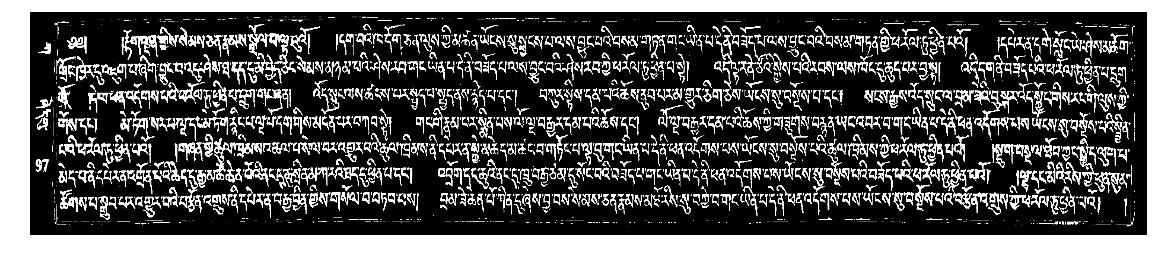

Output


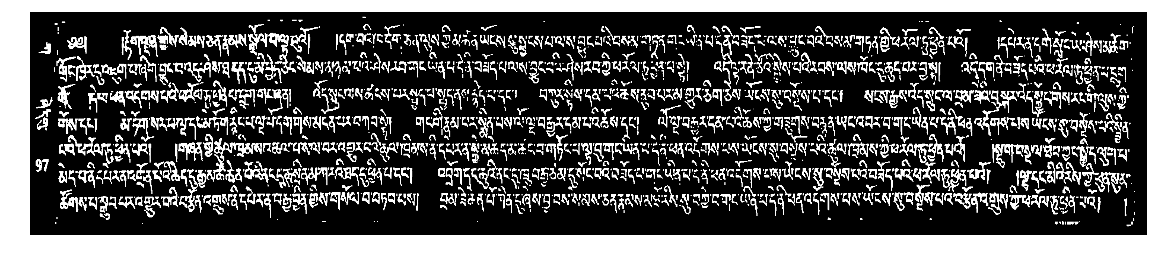

In [199]:
kernel = np.ones((3, 1), np.uint8)
output = cv2.morphologyEx(output, cv2.MORPH_OPEN, kernel)
print('Input')
plot(thresh, cmap='gray')
print('Output')
plot(output, cmap='gray');

### 4. Closing
- Closing is reverse of Opening, Dilation followed by Erosion
- It is useful in closing small holes inside the foreground objects, or small black points on the object. 

Closing to recontruct the text

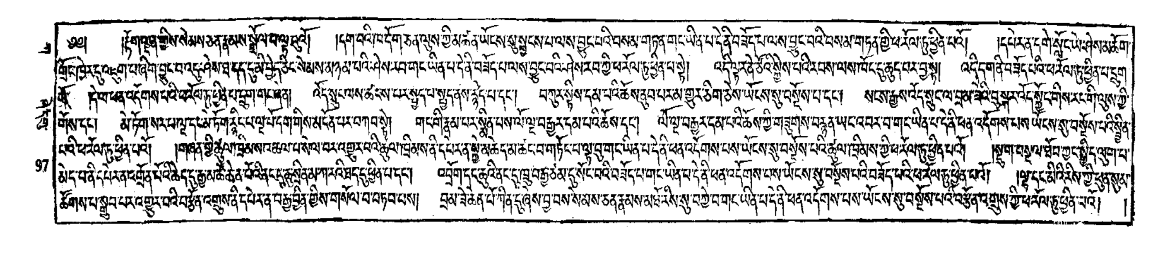

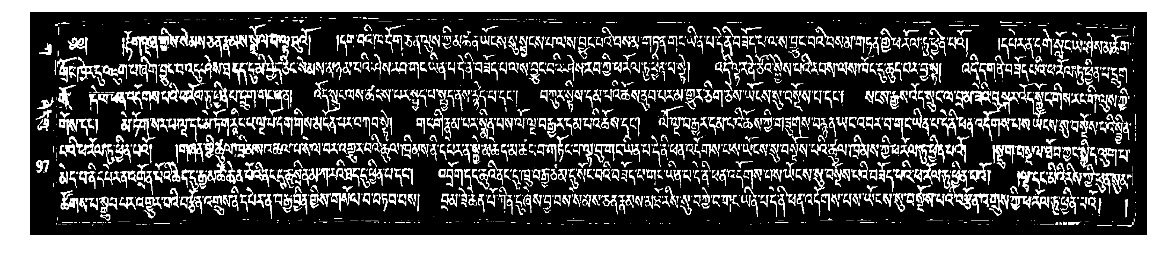

In [191]:
kernel = np.ones((2, 2), np.uint8)
final_1 = cv2.morphologyEx(output, cv2.MORPH_CLOSE, kernel)
plot(img)
plot(final_1, cmap='gray')

Inverse the image and save

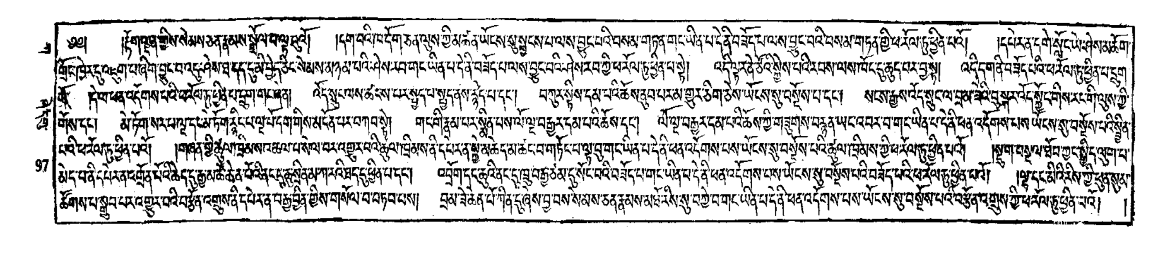

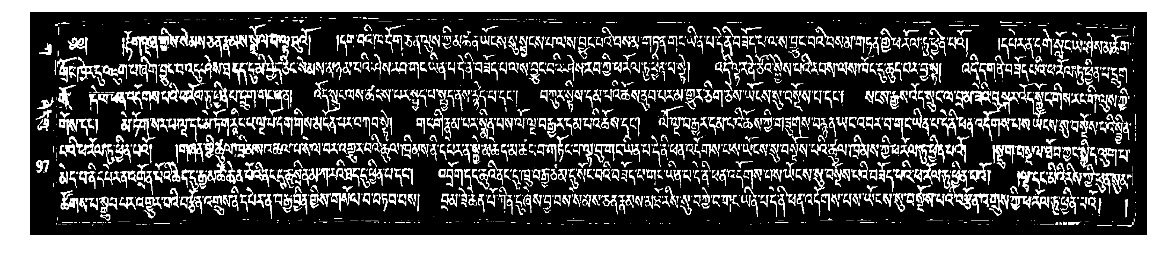

In [194]:
ret,final_2 = cv2.threshold(final_1,127,255,cv2.THRESH_TRUNC)
plot(img)
plot(final_2, cmap='gray')

### 5. Morphological Gradient
- It is the difference between dilation and erosion of an image.
- The result will look like the outline of the object. 

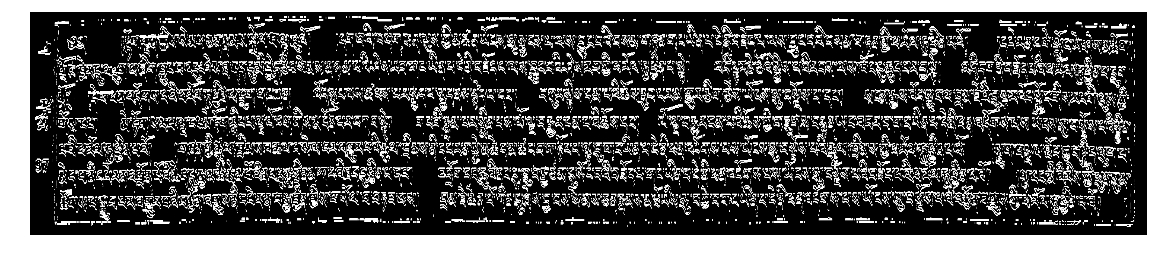

In [133]:
kernel = np.ones((5, 1), np.uint8)
gradient = cv2.morphologyEx(thresh, cv2.MORPH_GRADIENT, kernel)
plot(gradient, cmap='gray')

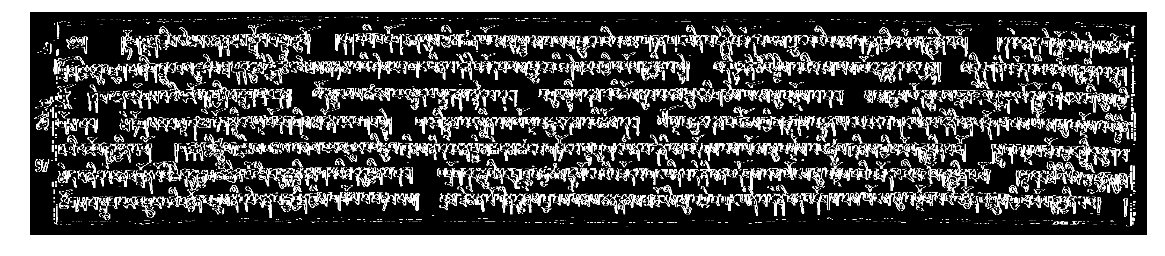

In [134]:
kernel = np.ones((1, 5), np.uint8)
gradient = cv2.morphologyEx(thresh, cv2.MORPH_GRADIENT, kernel)
plot(gradient, cmap='gray')

### 6. Top Hat 
- It is the difference between input image and Opening of the image.

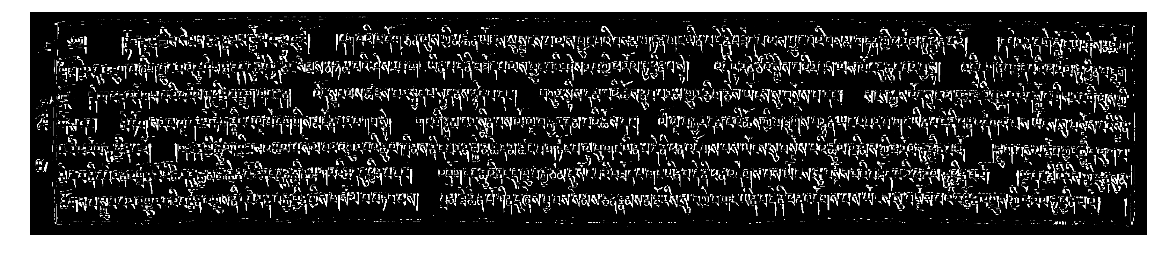

In [135]:
kernel = np.ones((1, 10), np.uint8)
tophat = cv2.morphologyEx(thresh, cv2.MORPH_TOPHAT, kernel)
plot(tophat, cmap='gray')

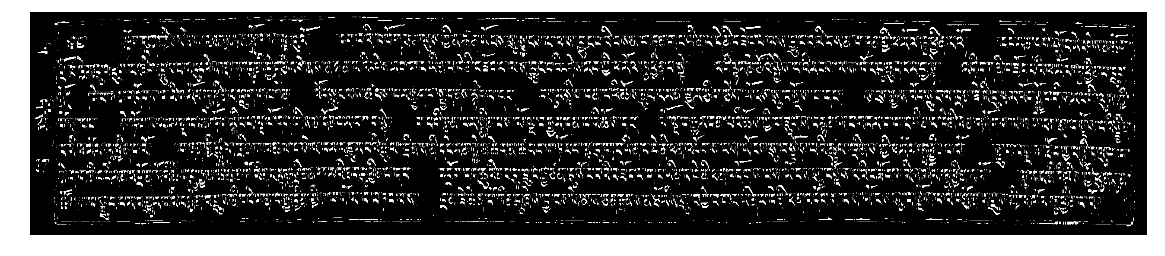

In [136]:
kernel = np.ones((10, 1), np.uint8)
tophat = cv2.morphologyEx(thresh, cv2.MORPH_TOPHAT, kernel)
plot(tophat, cmap='gray')

### 7. Black Hat
- It is the difference between the closing of the input image and input image.

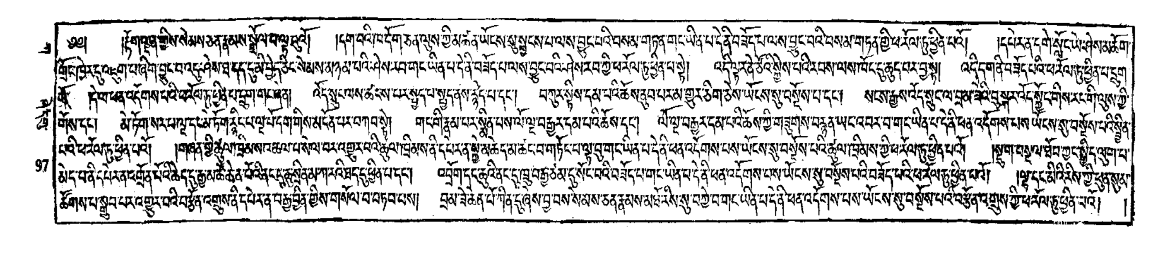

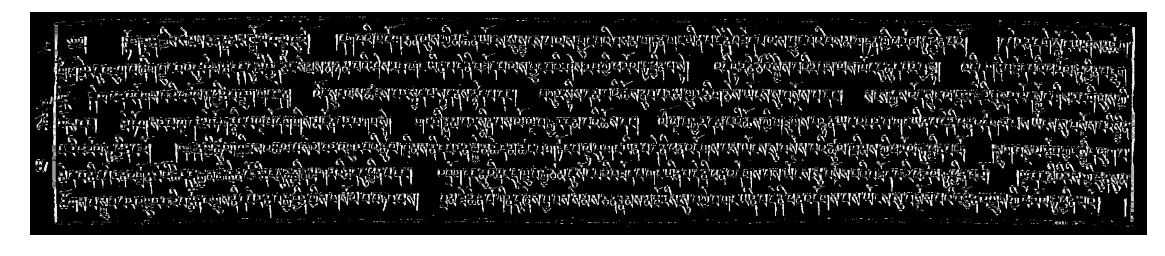

In [138]:
kernel = np.ones((1, 10), np.uint8)
blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernel)
plot(img)
plot(blackhat)

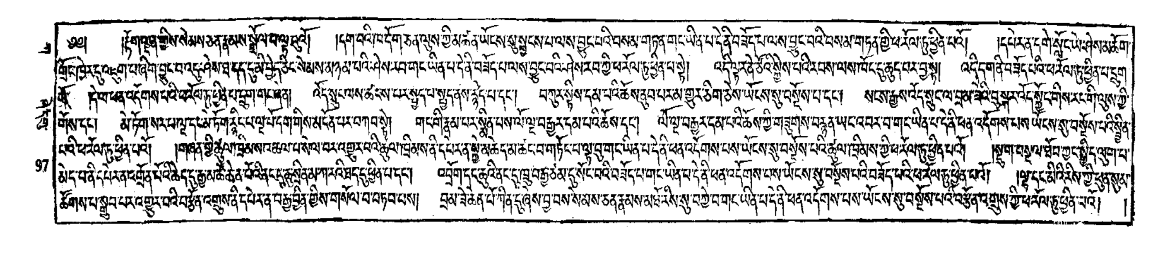

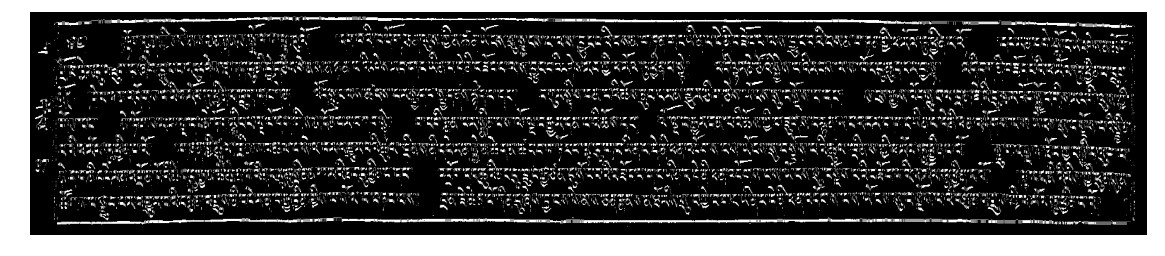

In [139]:
kernel = np.ones((10, 1), np.uint8)
blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernel)
plot(img)
plot(blackhat)